# `Matplotlib Annotations`


### `EDA`

In [1]:
import pandas as pd
import duckdb

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")
df

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Woonsocket,Rhode Island,5,"12,518",1.0,15.0,NaN,1,52,64,...,131,8.0,NaN,45,7,25,7,2,NaN,1.0
157,Worcester,Massachusetts,10,"37,652",1.0,192.0,11,12,103,20,...,714,8.0,2,"7,542",21,614,40,38,55.0,4.0
158,Yonkers,New York,65,"14,634",2.0,26.0,4,7,"1,032",6,...,572,2.0,2,289,75,18,45,19,4.0,9.0
159,York,Pennsylvania,5,"1,304",2.0,2.0,NaN,NaN,64,1,...,25,NaN,1,10,18,1,7,1,NaN,1.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

In [3]:
df["Total foreign born"].iloc[0]

'7,127'

In [4]:
df = df.fillna("0")
df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,0,0,1,190,9,...,187,1.0,2,200,258,0,226,8,0,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",0,1.0,0,2,337,2,...,66,1.0,0,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,0,0,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [5]:
columns = ["Sweden","Norway","Finland","Denmark","Total foreign born"]

df_nordic = df[columns]

df_nordic = df_nordic.fillna("0")

df_nordic.head()

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,"7,127"
1,65,12,3,21,"17,718"
2,186,9,5,15,"30,216"
3,5,2,0,5,"2,991"
4,32,4,3,5,"3,301"


In [6]:
for column in columns:
    df[column] = df_nordic[column].str.replace(",","").astype(int)
    
df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,7127,4.0,0,0,1,190,9,...,187,1.0,2,200,258,0,226,8,0,6.0
1,Albany,New York,55,17718,3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,30216,4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,2991,0,1.0,0,2,337,2,...,66,1.0,0,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,3301,2.0,7.0,0,0,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [ ]:
columns_to_change_type = (
    "Total foreign born",
    "Sweden",
    "Norway",
    "Denmark",
    "Finland",
)

for column in columns_to_change_type:
    df[column] = df_nordic[column].str.replace(",", "").astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   City                                         161 non-null    object
 1   State                                        161 non-null    object
 2   Error                                        161 non-null    int64 
 3   Total foreign born                           161 non-null    int64 
 4   Africa                                       161 non-null    object
 5   Asia (except China, Japan, and India)        161 non-null    object
 6   Atlantic Islands                             161 non-null    object
 7   Australia                                    161 non-null    object
 8   Austria                                      161 non-null    object
 9   Belgium                                      161 non-null    object
 10  Bohemia       

In [10]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Sweden              161 non-null    int64
 1   Norway              161 non-null    int64
 2   Finland             161 non-null    int64
 3   Denmark             161 non-null    int64
 4   Total foreign born  161 non-null    int64
dtypes: int64(5)
memory usage: 6.4 KB


In [11]:
df_nordic_country = duckdb.query(
    """--sql    
        WITH nordic AS (
        FROM df 
            SELECT 
                state, 
                SUM("Total foreign born") as "Total foreigners", 
                SUM("Sweden") as Swedes, 
                SUM("Norway") as Norwegians, 
                SUM("Denmark") as Danish, 
                SUM("Finland") as Finnish, 
            GROUP BY
                state
        )
        FROM nordic n
        SELECT 
            *,
            n.swedes + n.norwegians + n.danish + n.finnish AS Nordic
        ORDER BY 
            nordic
        DESC
    """
).df()

df_nordic_country.head(10)

,State,Total foreigners,Swedes,Norwegians,Danish,Finnish,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0
5,California,160828.0,7223.0,2729.0,3082.0,986.0,14020.0
6,Washington,40868.0,5150.0,3686.0,1193.0,603.0,10632.0
7,Pennsylvania,514506.0,5986.0,861.0,1210.0,378.0,8435.0
8,Nebraska,34456.0,4864.0,457.0,2888.0,11.0,8220.0
9,Connecticut,101502.0,6647.0,273.0,1144.0,41.0,8105.0


TODO for reader
- more visualizations on nordic
- more visualizations on total foreigners
- ex bar charts for different states
- compare nordic to total foreigners

### `Plotting`

In [12]:
df_nordic_country.shape

(39, 7)

In [ ]:
top_3_nordic = (
    df_nordic_country.drop(["Total foreigners","Nordic"], axis=1).set_index("State").iloc[:3]
)

top_3_nordic

,Swedes,Norwegians,Danish,Finnish
State,,,,
Illinois,57158.0,22300.0,10374.0,447.0
Minnesota,34984.0,17087.0,2975.0,1101.0
New York,29961.0,11752.0,6186.0,3764.0


(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

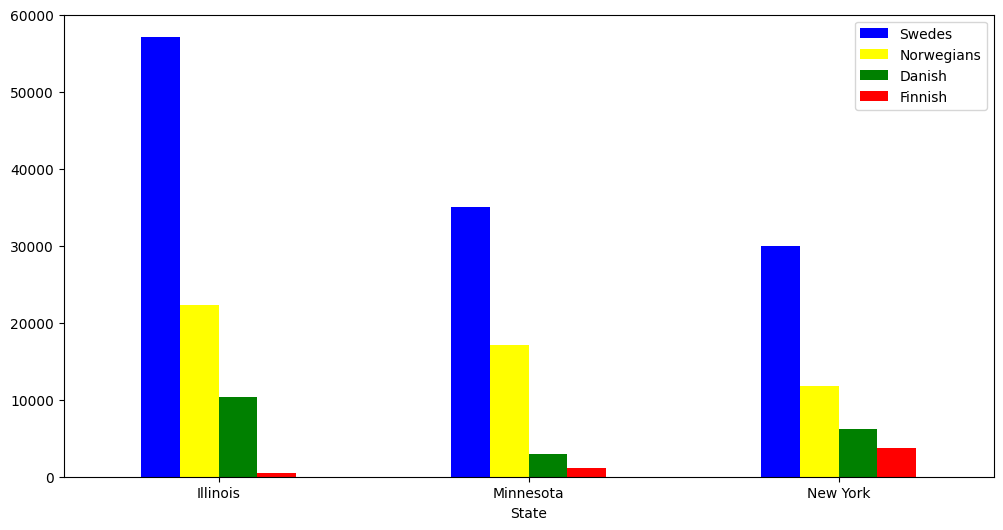

In [ ]:
import matplotlib.pyplot as plt

colour = ['blue', 'yellow', 'green', 'red',]

def nordic_plot():

    ax = top_3_nordic.plot(kind="bar", figsize=(12, 6), color=colour)
    ax.set_xticklabels(top_3_nordic.index, rotation=0)

    fig = ax.get_figure()

    return fig, ax

nordic_plot()

4 containers - each with 3 artists

- 1 BarContainer per column - Swedes, Norwegians, Danish, Finnish
- 3 artists - in this case bars are the artists
- e.g. BarContainer for Swedes have one artist for Illinois, Minnesota and New York


[<BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

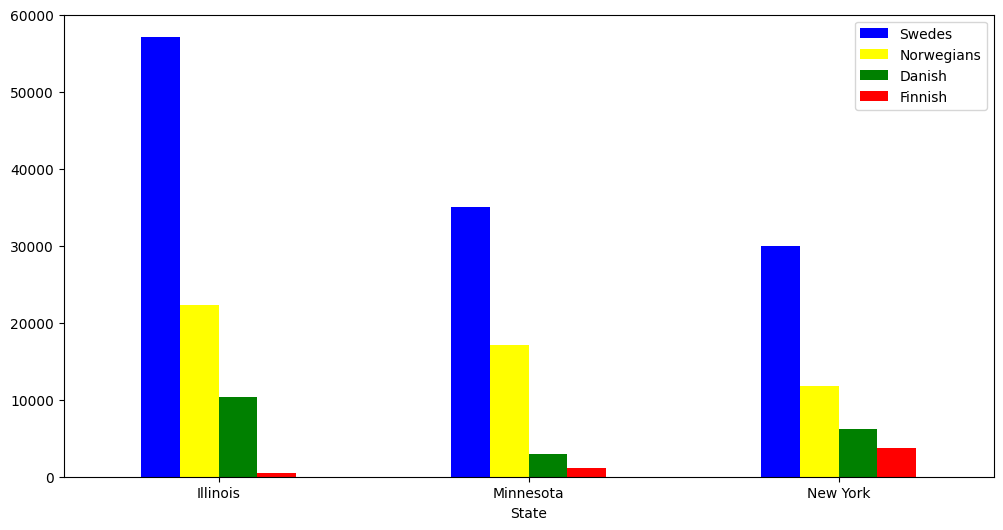

In [15]:
fig, ax = nordic_plot()

ax.containers

In [16]:
ax.containers[0]

<BarContainer object of 3 artists>

In [17]:
ax.containers[0][0]

In [18]:
ax.containers[0][1].get_height(), ax.containers[0][1].get_x()

(np.float64(34984.0), np.float64(0.75))

### `Annotate with arrow`


Text(0.8, 42000, 'Swedes')

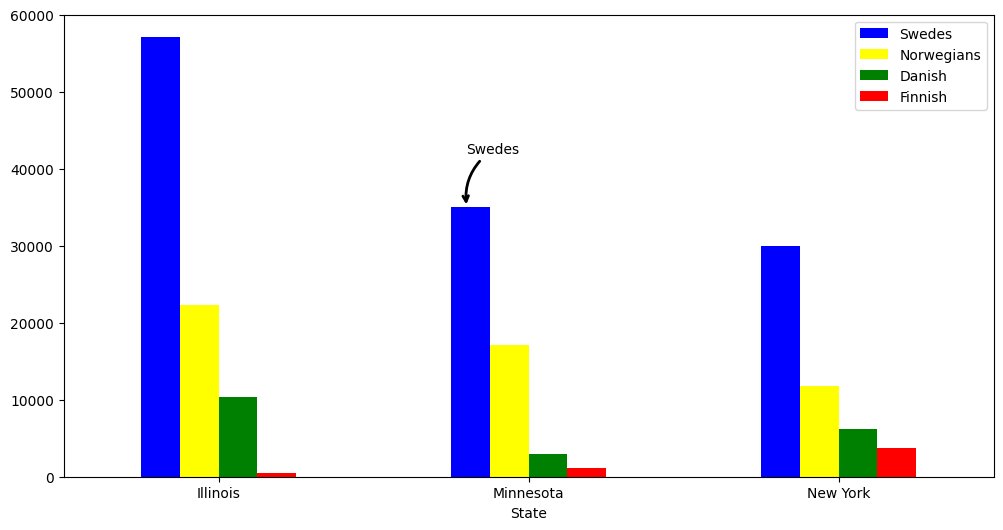

In [22]:
fig, ax = nordic_plot()

arrowprops = dict(arrowstyle="->", linewidth=2, connectionstyle="arc3, rad = .3")
ax.annotate(text="Swedes", xy=(0.8, 35000), arrowprops=arrowprops, xytext=(0.8, 42000))

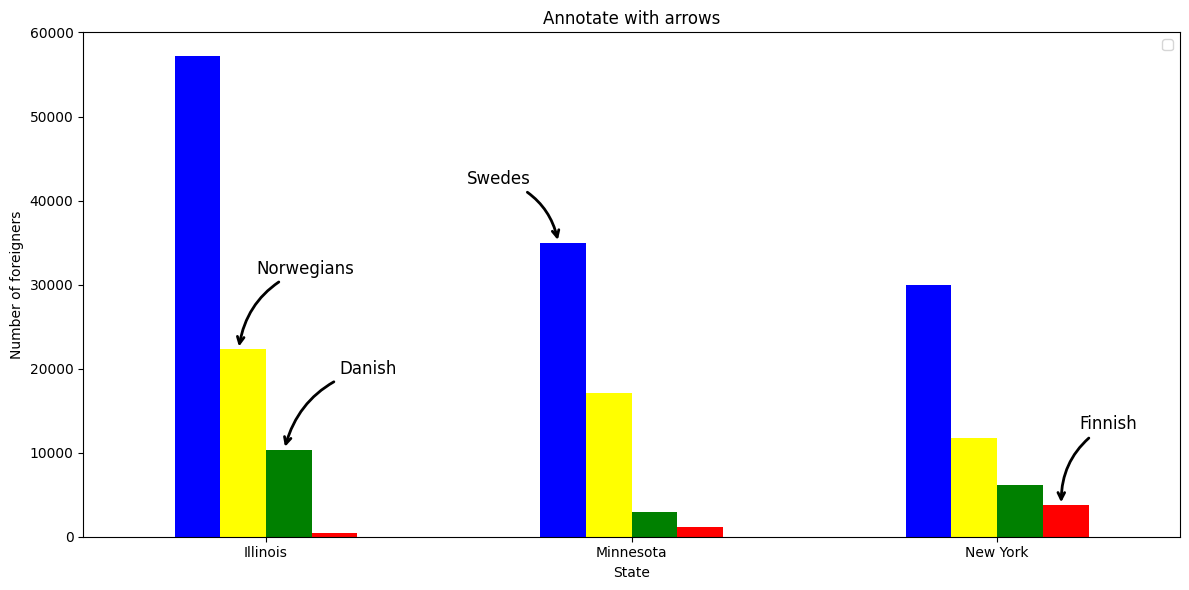

In [33]:
fig, ax = nordic_plot()

swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers


def annotate_nordic(bar_artist, text, x_offset, y_offset):
    xy = (bar_artist.get_x(), bar_artist.get_height())

    rad = -0.3 if x_offset < 0 else 0.3

    arrowprops = dict(arrowstyle="->", connectionstyle=f"arc3, rad={rad}", linewidth=2)

    ax.annotate(
        text=text,
        xy=(xy[0] + 0.05, xy[1]),
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
        arrowprops=arrowprops,
        fontsize=12,
    )


annotate_nordic(swede_bars[1], "Swedes", x_offset=-0.2, y_offset=7000)
annotate_nordic(norwegian_bars[0], "Norwegians", x_offset=0.1, y_offset=9000)
annotate_nordic(finnish_bars[2], "Finnish", x_offset=0.1, y_offset=9000)
annotate_nordic(danish_bars[0], "Danish", x_offset=0.2, y_offset=9000)

ax.set(title = "Annotate with arrows", ylabel="Number of foreigners")
ax.legend("")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/annotate_arrows.png")